Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

Loading the Dataset

In [2]:
df = pd.read_csv('AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

Ensuring the necessary columns are present


In [3]:
if not {'Open', 'High', 'Low', 'Close'}.issubset(df.columns):
    raise ValueError("The dataset must contain 'Open', 'High', 'Low', 'Close' columns")

Preprocessing the Data for LSTM


In [4]:
data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

training_data_len = int(np.ceil(len(dataset) * .8))

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Building and Training the LSTM Model
(IT WILL TAKE SOME TIME TO TRAIN)

In [5]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

5153/5153 ━━━━━━━━━━━━━━━━━━━━ 191s 35ms/step - loss: 1.1518e-04


Creating Test Dataset

In [6]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

# Reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Making Predictions


In [7]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


Ploting the Line Chart
Creating a new DataFrame for plotting

In [ ]:
df['Predictions'] = np.nan
df.iloc[training_data_len:, df.columns.get_loc('Predictions')] = predictions[:, 0]

Plotting the actual and predicted prices

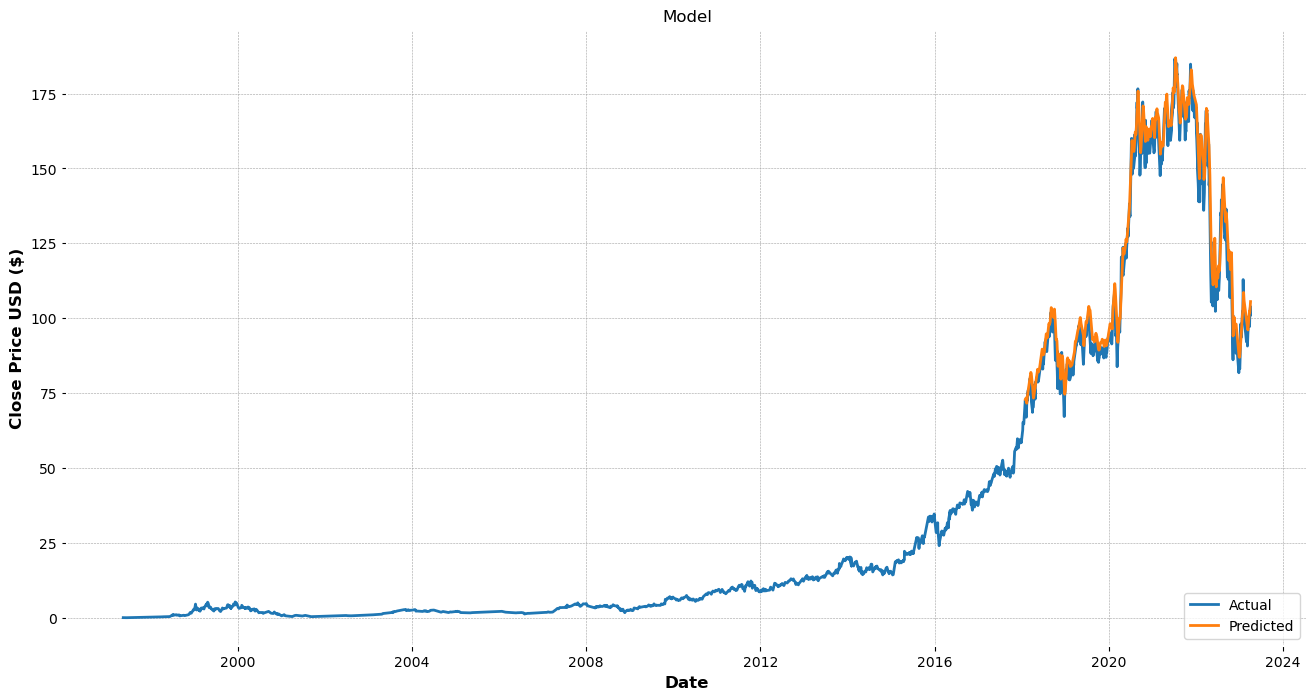

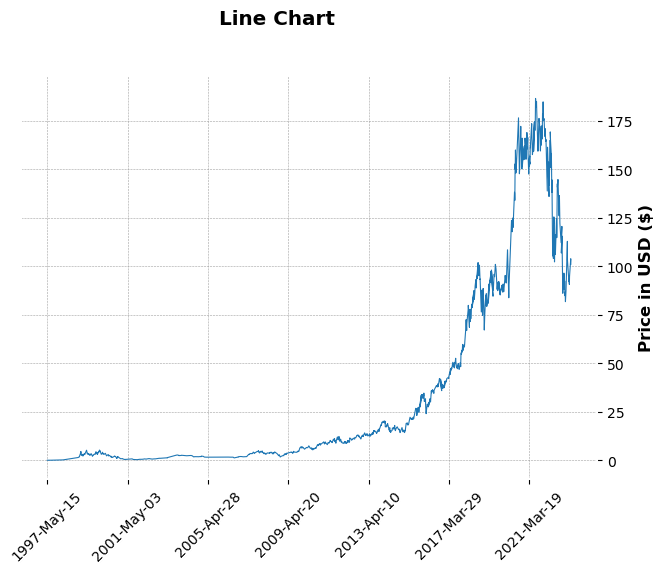

In [15]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'], label='Actual Price')
plt.plot(df['Predictions'], label='Predicted Price')
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.show()


mpf.plot(df_candlestick, type='line', style='charles', title='Line Chart', ylabel='Price in USD ($)')

Displaying the Difference b/w Predicted and Actual Price.
Determining the Accuracy of Model.

In [32]:
actual_prices = df.iloc[training_data_len:]['Close'].values
predicted_prices = predictions.flatten()

differences = actual_prices - predicted_prices

print("Date\t Actual Price\t Predicted Price\tDifference")
print("----------------------------------------------------------")
for i in range(len(actual_prices)):
    date = df.index[training_data_len + i].strftime("%Y-%m-%d")
    actual_price = actual_prices[i]
    predicted_price = predicted_prices[i]
    difference = differences[i]
    print(f"{date}\t{actual_price:.2f}\t\t{predicted_price:.2f}\t\t{difference:.2f}")

Date	 Actual Price	 Predicted Price	Difference
----------------------------------------------------------
2018-02-01	69.50		72.89		-3.39
2018-02-02	71.50		73.08		-1.58
2018-02-05	69.50		73.33		-3.83
2018-02-06	72.14		73.19		-1.05
2018-02-07	70.84		73.40		-2.56
2018-02-08	67.53		73.46		-5.94
2018-02-09	66.98		72.87		-5.89
2018-02-12	69.31		72.03		-2.72
2018-02-13	70.73		71.66		-0.93
2018-02-14	72.55		71.77		0.78
2018-02-15	73.09		72.38		0.71
2018-02-16	72.43		73.19		-0.75
2018-02-20	73.42		73.82		-0.40
2018-02-21	74.15		74.46		-0.31
2018-02-22	74.27		75.12		-0.85
2018-02-23	75.00		75.70		-0.70
2018-02-26	76.10		76.28		-0.18
2018-02-27	75.60		76.96		-1.36
2018-02-28	75.62		77.46		-1.84
2018-03-01	74.67		77.82		-3.14
2018-03-02	75.01		77.88		-2.87
2018-03-05	76.18		77.89		-1.71
2018-03-06	76.88		78.07		-1.19
2018-03-07	77.25		78.42		-1.17
2018-03-08	77.59		78.84		-1.24
2018-03-09	78.94		79.27		-0.33
2018-03-12	79.92		79.89		0.03
2018-03-13	79.41		80.64		-1.23
2018-03-14	79.55		81.22		-1.6